In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web   
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
import datetime
import cufflinks as cf
import plotly.offline as plyo
import plotly as ply
import plotly.graph_objs as go
import yfinance as yf

plyo.init_notebook_mode(connected=True)

In [2]:
stock_list = ['GOOGL', 'JPM', 'MSFT', 'AAPL', 'VZ', 'AMZN', 'JNJ', 'MMM', 'BRK-B', 'BMY']
data = []

In [3]:
for stock in stock_list:
    stock_df = yf.download(stock, start='2015-1-1', end='2020-1-1', progress=True)
    stock_df.ffill(inplace=True)
    data.append(stock_df['Adj Close'] / stock_df['Adj Close'].shift(1) - 1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
df = pd.DataFrame(data, index=stock_list).T
df.head(10)

,GOOGL,JPM,MSFT,AAPL,VZ,AMZN,JNJ,MMM,BRK-B,BMY
Date,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.002092,0.004985,0.006674,-0.009513,0.003848,-0.005897,-0.000478,-0.001582,-0.006527,0.008131
2015-01-05,-0.019054,-0.031045,-0.009196,-0.028172,-0.008305,-0.020517,-0.006984,-0.022553,-0.014547,-0.015627
2015-01-06,-0.024679,-0.025929,-0.014677,0.000094,0.010092,-0.022833,-0.004914,-0.010663,-0.001088,-0.001707
2015-01-07,-0.002941,0.001526,0.012705,0.014022,-0.006453,0.010600,0.022076,0.007249,0.013893,0.012996
2015-01-08,0.003484,0.022347,0.029418,0.038422,0.021433,0.006836,0.007863,0.023967,0.016725,0.024983
2015-01-09,-0.012211,-0.017387,-0.008405,0.001073,-0.008902,-0.011749,-0.013629,-0.012284,-0.012552,-0.006588
2015-01-12,-0.007309,-0.008594,-0.012503,-0.024641,0.006844,-0.018590,-0.003430,-0.005445,-0.007961,0.030836
2015-01-13,0.009536,0.000170,-0.005150,0.008879,0.002124,0.011427,0.001721,-0.000746,0.002360,0.015117


In [5]:
# df.to_csv('daily.csv')

In [6]:
df.index = pd.to_datetime(df.index)
df = df.iloc[1:,]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-01-02 to 2019-12-31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOGL   1258 non-null   float64
 1   JPM     1258 non-null   float64
 2   MSFT    1258 non-null   float64
 3   AAPL    1258 non-null   float64
 4   VZ      1258 non-null   float64
 5   AMZN    1258 non-null   float64
 6   JNJ     1258 non-null   float64
 7   MMM     1258 non-null   float64
 8   BRK-B   1258 non-null   float64
 9   BMY     1258 non-null   float64
dtypes: float64(10)
memory usage: 108.1 KB


In [7]:
def total_return_from_returns(returns):
    """Retuns the return between the first and last value of the DataFrame.
    Parameters
    ----------
    returns : pandas.Series or pandas.DataFrame
    Returns
    -------
    total_return : float or pandas.Series
        Depending on the input passed returns a float or a pandas.Series.
    """
    return (returns + 1).prod() - 1

In [8]:
monthly_return = df.groupby([df.index.year, df.index.month]).apply(total_return_from_returns)
monthly_return.tail(12)

GOOGL       JPM      MSFT      AAPL        VZ      AMZN  \
Date Date                                                               
2019 1     0.077448  0.068844  0.028158  0.055154 -0.010412  0.144317   
     2     0.000586  0.008309  0.077358  0.044777  0.033781 -0.045906   
     3     0.044685 -0.029992  0.052754  0.097026  0.038827  0.085936   
     4     0.018753  0.155171  0.107343  0.056436 -0.022844  0.081859   
     5    -0.077117 -0.086945 -0.049481 -0.124213 -0.049659 -0.078613   
     6    -0.021419  0.055115  0.083118  0.130519  0.051150  0.066792   
     7     0.125046  0.044913  0.017244  0.076394 -0.022374 -0.014179   
     8    -0.022714 -0.052931  0.015037 -0.016461  0.052289 -0.048474   
     9     0.025711  0.071273  0.008487  0.072961  0.037827 -0.022733   
     10    0.030840  0.069935  0.031216  0.110684  0.012246  0.023475   
     11    0.035979  0.054755  0.059463  0.077554 -0.003804  0.013587   
     12    0.027069  0.057984  0.041749  0.098784  0.019256  0.026122   

                JNJ       MMM     BRK-B       BMY  
Date Date                                          
2019 1     0.031228  0.051223  0.006661 -0.042726  
     2     0.033560  0.042555 -0.020629  0.046384  
     3     0.023053  0.001881 -0.002037 -0.076461  
     4     0.010087 -0.087929  0.078750 -0.018243  
     5    -0.064820 -0.149824 -0.089013 -0.022830  
     6     0.061990  0.085070  0.079779 -0.000441  
     7    -0.065049  0.007961 -0.036309 -0.012050  
     8    -0.006897 -0.065935 -0.009833  0.082414  
     9     0.007946  0.016572  0.022664  0.054920  
     10    0.020559  0.003589  0.021921  0.140840  
     11    0.048490  0.037880  0.036316 -0.007495  
     12    0.060950  0.039171  0.028143  0.127327

In [9]:
# monthly_return.to_csv('monthly_return.csv')

In [10]:
SNP = yf.download('^GSPC', start='2015-1-1', end='2020-1-1', progress=True)
SNP500 = SNP['Adj Close'] / SNP['Adj Close'].shift(1) - 1
SNP500 = SNP500[1:]

df2 = pd.concat([df, SNP500], axis=1)
df2.rename(columns={'Adj Close': 'SNP500'}, inplace=True) 
df2.head()

[*********************100%***********************]  1 of 1 completed


,GOOGL,JPM,MSFT,AAPL,VZ,AMZN,JNJ,MMM,BRK-B,BMY,SNP500
Date,,,,,,,,,,,
2015-01-02,-0.002092,0.004985,0.006674,-0.009513,0.003848,-0.005897,-0.000478,-0.001582,-0.006527,0.008131,-0.000340
2015-01-05,-0.019054,-0.031045,-0.009196,-0.028172,-0.008305,-0.020517,-0.006984,-0.022553,-0.014547,-0.015627,-0.018278
2015-01-06,-0.024679,-0.025929,-0.014677,0.000094,0.010092,-0.022833,-0.004914,-0.010663,-0.001088,-0.001707,-0.008893
2015-01-07,-0.002941,0.001526,0.012705,0.014022,-0.006453,0.010600,0.022076,0.007249,0.013893,0.012996,0.011630
2015-01-08,0.003484,0.022347,0.029418,0.038422,0.021433,0.006836,0.007863,0.023967,0.016725,0.024983,0.017888


In [11]:
# fund_close = pd.read_excel('/Users/andy/Desktop/fund.xlsx')
# fund_close = fund_close.set_index('Date')
# fund_close.head()

In [12]:
# Fund_return = fund_close['Return']
# Fund_return.head()

In [13]:
# daily_return = pd.concat([df2, Fund_return], axis = 1)
# daily_return.head()

In [14]:
# daily_return.to_csv('daily_return.csv')

In [15]:
# MSCI = pd.read_excel('/Users/andy/Downloads/MSCI World Price Index USD.xlsx')
# MSCI = MSCI.set_index('Date')
# MSCI.index = pd.to_datetime(MSCI.index)
# MSCI['return'] = MSCI['Close'] / MSCI['Close'].shift(1) - 1
# MSCI.head()

In [16]:
# Period = daily_return.index
# Period

In [17]:
# Benchmark = MSCI.loc[Period, ]
# Benchmark.head()
# Benchmark.to_csv('Benchmark.csv')

In [18]:
# Daily_return = pd.concat([daily_return, Benchmark['return']], axis=1)
# Daily_return.rename(columns={'return': 'MSCI'}, inplace=True)
# Daily_return.head()

In [19]:
# Daily_return.to_csv('Daily_return.csv')

In [20]:
Daily_return = pd.read_excel('/Users/andy/Desktop/PM/Daily_return.xlsx')
Daily_return = Daily_return.set_index('Date')
Daily_return.head()

,GOOGL,JPM,MSFT,AAPL,VZ,AMZN,JNJ,MMM,BRK-B,BMY,Fund,Optimal Risky Portfolio,Minimum Variance Portfolio,Equally Weight Portfolio,MSCI,S&P 500
Date,,,,,,,,,,,,,,,,
2015-01-02,-0.002092,0.004985,0.006674,-0.009513,0.003848,-0.005897,-0.000478,-0.001582,-0.006527,0.008131,0.000000,-0.000308,-0.001583,-0.000245,-0.002907,-0.000340
2015-01-05,-0.019054,-0.031045,-0.009196,-0.028172,-0.008305,-0.020517,-0.006984,-0.022553,-0.014547,-0.015627,-0.016116,-0.017939,-0.012707,-0.017600,-0.019628,-0.018278
2015-01-06,-0.024679,-0.025929,-0.014677,0.000094,0.010092,-0.022833,-0.004914,-0.010663,-0.001088,-0.001707,-0.008056,-0.012980,-0.003131,-0.009631,-0.010094,-0.008894
2015-01-07,-0.002941,0.001526,0.012705,0.014022,-0.006453,0.010600,0.022076,0.007249,0.013893,0.012996,0.012182,0.006513,0.008796,0.008567,0.004739,0.011630
2015-01-08,0.003484,0.022347,0.029418,0.038422,0.021433,0.006836,0.007863,0.023967,0.016725,0.024983,0.016582,0.018920,0.014897,0.019548,0.019221,0.017888


In [21]:
data2 = []
for col in Daily_return.columns:
    a = ((Daily_return[col]+1).cumprod()-1)
    data2.append(a)
    
df2_T = pd.DataFrame(data2)
AC_return = df2_T.T
AC_return.tail()

,GOOGL,JPM,MSFT,AAPL,VZ,AMZN,JNJ,MMM,BRK-B,BMY,Fund,Optimal Risky Portfolio,Minimum Variance Portfolio,Equally Weight Portfolio,MSCI,S&P 500
Date,,,,,,,,,,,,,,,,
2019-12-24,1.533506,1.522528,2.774021,1.802924,0.643770,4.765136,0.600891,0.230579,0.501632,0.216542,0.025363,2.684018,0.774562,1.321202,0.356704,0.565583
2019-12-26,1.567501,1.549297,2.804956,1.858536,0.644039,5.021492,0.599794,0.229952,0.508159,0.231951,0.030119,2.763998,0.782833,1.347319,0.361892,0.573611
2019-12-27,1.552746,1.551131,2.811910,1.857451,0.650476,5.024811,0.598916,0.234619,0.506094,0.235418,0.029590,2.769394,0.782013,1.348628,0.364598,0.573665
2019-12-30,1.524611,1.541780,2.779057,1.874410,0.641893,4.950991,0.593980,0.224659,0.503563,0.227521,0.023778,2.741513,0.774584,1.335934,0.357876,0.564568
2019-12-31,1.524008,1.555898,2.781695,1.895412,0.646989,4.954052,0.600233,0.228768,0.508492,0.236381,0.026948,2.750300,0.780263,1.344043,0.360888,0.569177


In [22]:
# AC_return.to_csv('AC_return.csv')

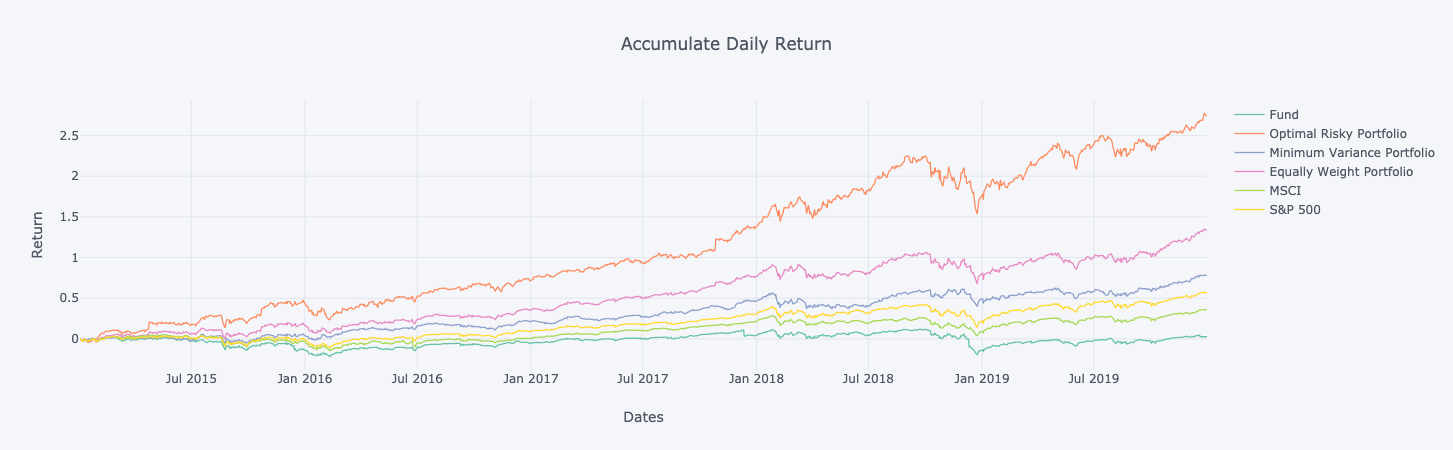

CPU times: user 1.4 s, sys: 71.9 ms, total: 1.47 s
Wall time: 1.94 s


In [23]:
%%time

performance = AC_return.iloc[0:, 10:]

plyo.iplot(performance.iplot(asFigure=True,
                   theme='pearl',
                   title='Accumulate Daily Return',
                   xTitle='Dates',
                   yTitle='Return',
                   colorscale='set2'),
          #image='png',
          filename='df_ACreturn')

In [24]:
def VaR_plotting(ret, VaR_95, VaR_99, ES_95, ES_99):
    fig = plt.figure(figsize=(10, 6))
    plt.hist(ret, bins=50, alpha=0.5)
    plt.plot([VaR_95, VaR_95], [0, 100], 'r:', lw=2, label='95% VaR')
    plt.plot([VaR_99, VaR_99], [0, 100], 'p:', lw=2, label='99% VaR')
    plt.legend()
    plt.show()
    
    print(ret)
    print('VaR 95% Confidence Level: ', VaR_95)
    print('ES 95% Connfidence Level: ', ES_95)
    print('\n')
    
    print('VaR 99% Confidence Level: ', VaR_99)
    print('ES 99% Connfidence Level: ', ES_99)
    print('\n\n')

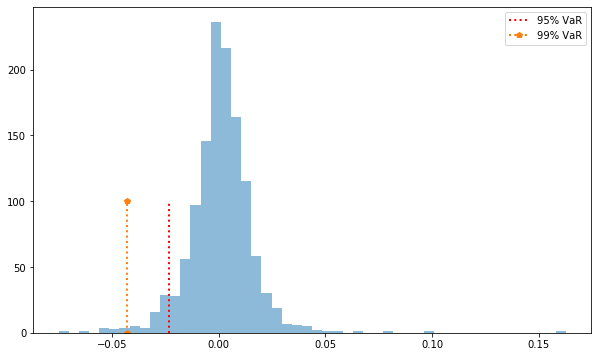

Date
2015-01-02   -0.002092
2015-01-05   -0.019054
2015-01-06   -0.024679
2015-01-07   -0.002941
2015-01-08    0.003484
                ...   
2019-12-24   -0.004590
2019-12-26    0.013418
2019-12-27   -0.005747
2019-12-30   -0.011021
2019-12-31   -0.000239
Name: GOOGL, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.02333585964153125
ES 95% Connfidence Level:  -0.03350722298944515


VaR 99% Confidence Level:  -0.04289140665975688
ES 99% Connfidence Level:  -0.051949191191849556





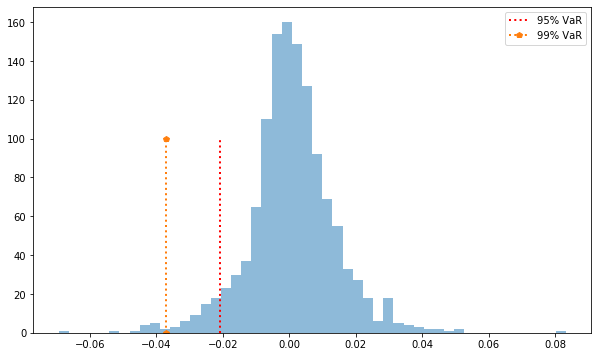

Date
2015-01-02    0.004985
2015-01-05   -0.031045
2015-01-06   -0.025929
2015-01-07    0.001526
2015-01-08    0.022347
                ...   
2019-12-24    0.002770
2019-12-26    0.010612
2019-12-27    0.000719
2019-12-30   -0.003665
2019-12-31    0.005554
Name: JPM, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.02087238777722567
ES 95% Connfidence Level:  -0.030157175833636505


VaR 99% Confidence Level:  -0.037102710271162104
ES 99% Connfidence Level:  -0.0454480184989019





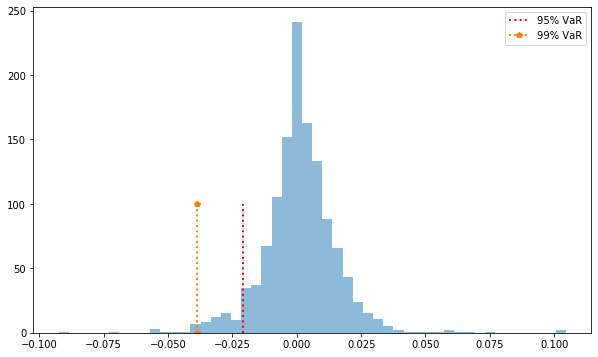

Date
2015-01-02    0.006674
2015-01-05   -0.009196
2015-01-06   -0.014677
2015-01-07    0.012705
2015-01-08    0.029418
                ...   
2019-12-24   -0.000191
2019-12-26    0.008197
2019-12-27    0.001828
2019-12-30   -0.008619
2019-12-31    0.000698
Name: MSFT, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.021056925020112794
ES 95% Connfidence Level:  -0.033567118513698584


VaR 99% Confidence Level:  -0.0386416851782605
ES 99% Connfidence Level:  -0.051389331535634006





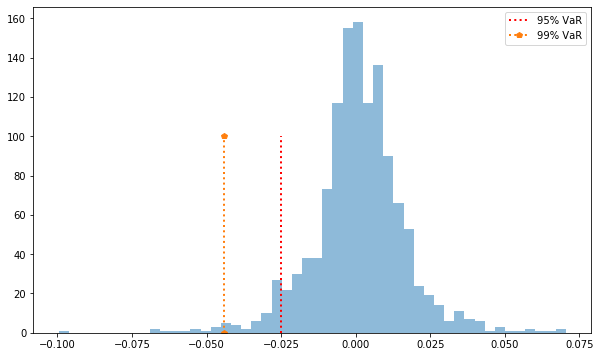

Date
2015-01-02   -0.009513
2015-01-05   -0.028172
2015-01-06    0.000094
2015-01-07    0.014022
2015-01-08    0.038422
                ...   
2019-12-24    0.000951
2019-12-26    0.019840
2019-12-27   -0.000379
2019-12-30    0.005935
2019-12-31    0.007307
Name: AAPL, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.02499560377463966
ES 95% Connfidence Level:  -0.036179968935555744


VaR 99% Confidence Level:  -0.04429320949803067
ES 99% Connfidence Level:  -0.05794507576599343





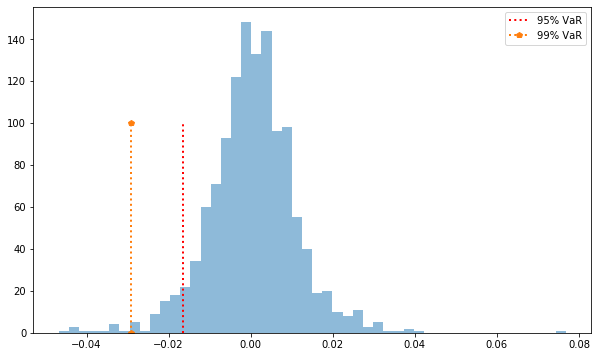

Date
2015-01-02    0.003848
2015-01-05   -0.008305
2015-01-06    0.010092
2015-01-07   -0.006453
2015-01-08    0.021433
                ...   
2019-12-24   -0.001954
2019-12-26    0.000163
2019-12-27    0.003916
2019-12-30   -0.005201
2019-12-31    0.003104
Name: VZ, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.016372136190683333
ES 95% Connfidence Level:  -0.024240884485887206


VaR 99% Confidence Level:  -0.029151395231754407
ES 99% Connfidence Level:  -0.03717101099290499





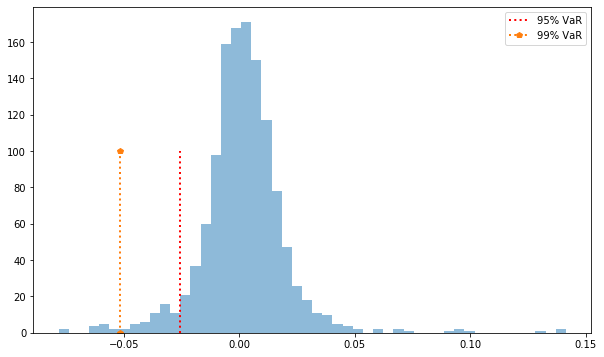

Date
2015-01-02   -0.005897
2015-01-05   -0.020517
2015-01-06   -0.022833
2015-01-07    0.010600
2015-01-08    0.006836
                ...   
2019-12-24   -0.002114
2019-12-26    0.044467
2019-12-27    0.000551
2019-12-30   -0.012253
2019-12-31    0.000514
Name: AMZN, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.025581920785383083
ES 95% Connfidence Level:  -0.0407396480800792


VaR 99% Confidence Level:  -0.051667707888397765
ES 99% Connfidence Level:  -0.06171282284049806





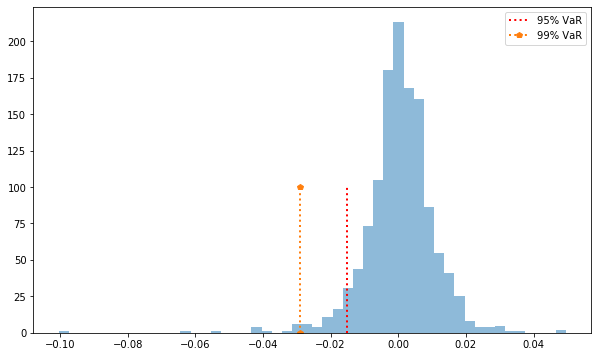

Date
2015-01-02   -0.000478
2015-01-05   -0.006984
2015-01-06   -0.004914
2015-01-07    0.022076
2015-01-08    0.007863
                ...   
2019-12-24   -0.003483
2019-12-26   -0.000685
2019-12-27   -0.000549
2019-12-30   -0.003087
2019-12-31    0.003923
Name: JNJ, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.01504615626555474
ES 95% Connfidence Level:  -0.024934386059281232


VaR 99% Confidence Level:  -0.02903086480639385
ES 99% Connfidence Level:  -0.044121635112547665





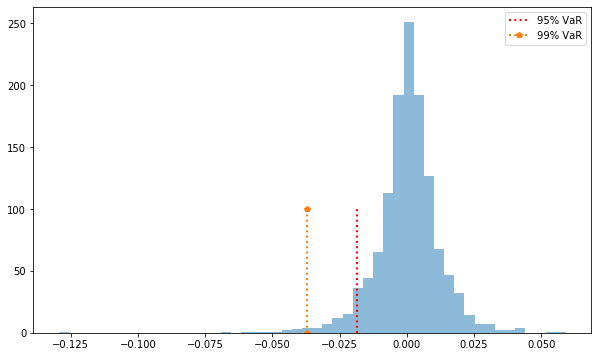

Date
2015-01-02   -0.001582
2015-01-05   -0.022553
2015-01-06   -0.010663
2015-01-07    0.007249
2015-01-08    0.023967
                ...   
2019-12-24   -0.010030
2019-12-26   -0.000509
2019-12-27    0.003794
2019-12-30   -0.008067
2019-12-31    0.003356
Name: MMM, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.018423415827158302
ES 95% Connfidence Level:  -0.03065207107784683


VaR 99% Confidence Level:  -0.03717548589080004
ES 99% Connfidence Level:  -0.0535873798620298





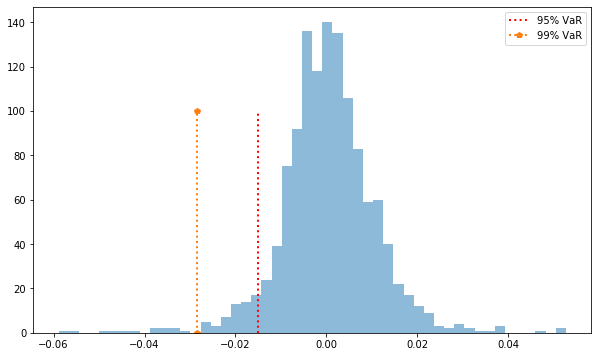

Date
2015-01-02   -0.006527
2015-01-05   -0.014547
2015-01-06   -0.001088
2015-01-07    0.013893
2015-01-08    0.016725
                ...   
2019-12-24   -0.000044
2019-12-26    0.004346
2019-12-27   -0.001369
2019-12-30   -0.001680
2019-12-31    0.003278
Name: BRK-B, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.014960466826269114
ES 95% Connfidence Level:  -0.0242454163088278


VaR 99% Confidence Level:  -0.028554823578176868
ES 99% Connfidence Level:  -0.04140775102760133





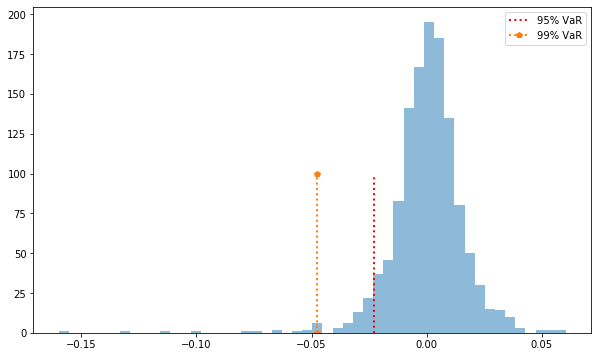

Date
2015-01-02    0.008131
2015-01-05   -0.015627
2015-01-06   -0.001707
2015-01-07    0.012996
2015-01-08    0.024983
                ...   
2019-12-24   -0.000791
2019-12-26    0.012666
2019-12-27    0.002814
2019-12-30   -0.006392
2019-12-31    0.007218
Name: BMY, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.022954497210326528
ES 95% Connfidence Level:  -0.04011037930116772


VaR 99% Confidence Level:  -0.047556146480033146
ES 99% Connfidence Level:  -0.08051779566473122





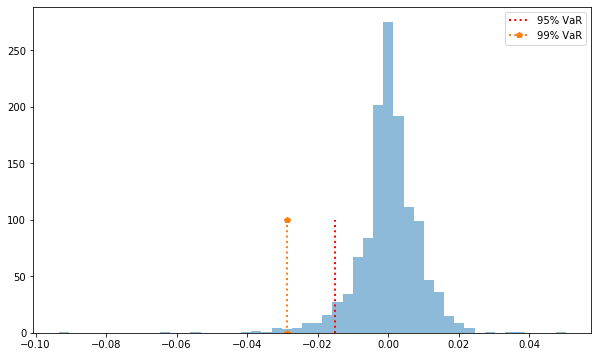

Date
2015-01-02    0.000000
2015-01-05   -0.016116
2015-01-06   -0.008056
2015-01-07    0.012182
2015-01-08    0.016582
                ...   
2019-12-24   -0.000515
2019-12-26    0.004638
2019-12-27   -0.000513
2019-12-30   -0.005645
2019-12-31    0.003097
Name: Fund, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.014991720911665351
ES 95% Connfidence Level:  -0.02399528967089136


VaR 99% Confidence Level:  -0.028760798035232765
ES 99% Connfidence Level:  -0.04218592487244144





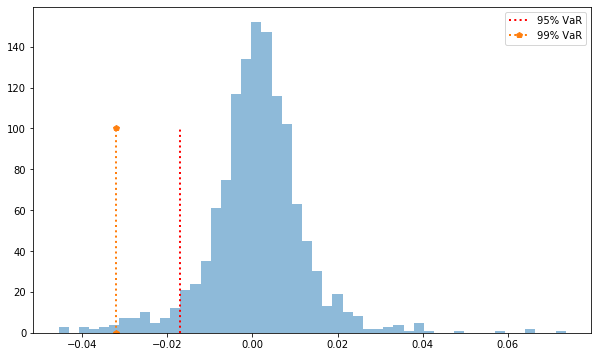

Date
2015-01-02   -0.000308
2015-01-05   -0.017939
2015-01-06   -0.012980
2015-01-07    0.006513
2015-01-08    0.018920
                ...   
2019-12-24   -0.000787
2019-12-26    0.021710
2019-12-27    0.001434
2019-12-30   -0.007397
2019-12-31    0.002348
Name: Optimal Risky Portfolio, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.01695628338978506
ES 95% Connfidence Level:  -0.02682293413637034


VaR 99% Confidence Level:  -0.032119350931179104
ES 99% Connfidence Level:  -0.03809782917385736





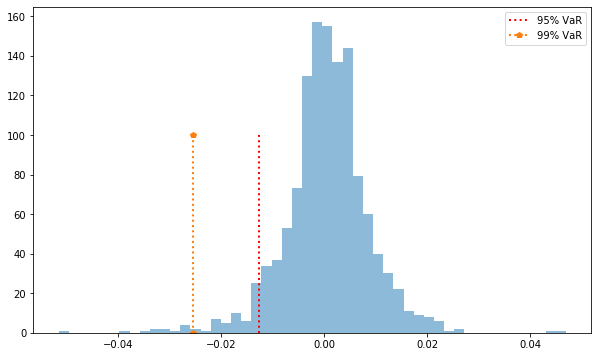

Date
2015-01-02   -0.001583
2015-01-05   -0.012707
2015-01-06   -0.003131
2015-01-07    0.008796
2015-01-08    0.014897
                ...   
2019-12-24   -0.001920
2019-12-26    0.004661
2019-12-27   -0.000460
2019-12-30   -0.004169
2019-12-31    0.003200
Name: Minimum Variance Portfolio, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.012693713422636142
ES 95% Connfidence Level:  -0.01963811439901736


VaR 99% Confidence Level:  -0.025479081667714502
ES 99% Connfidence Level:  -0.03195165812392501





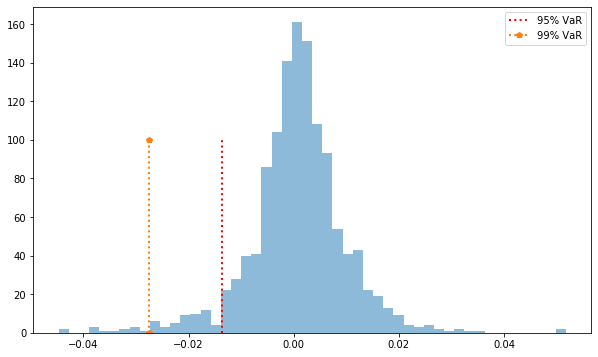

Date
2015-01-02   -0.000245
2015-01-05   -0.017600
2015-01-06   -0.009631
2015-01-07    0.008567
2015-01-08    0.019548
                ...   
2019-12-24   -0.001948
2019-12-26    0.011252
2019-12-27    0.000558
2019-12-30   -0.005405
2019-12-31    0.003471
Name: Equally Weight Portfolio, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.013700719351517362
ES 95% Connfidence Level:  -0.02296280672768912


VaR 99% Confidence Level:  -0.027537119063561606
ES 99% Connfidence Level:  -0.034996190218344596





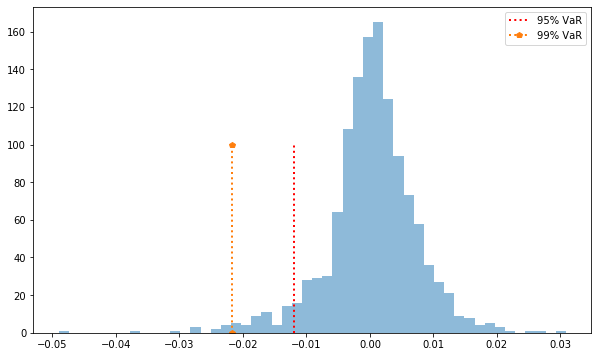

Date
2015-01-02   -0.002907
2015-01-05   -0.019628
2015-01-06   -0.010094
2015-01-07    0.004739
2015-01-08    0.019221
                ...   
2019-12-24    0.000464
2019-12-26    0.003824
2019-12-27    0.001987
2019-12-30   -0.004926
2019-12-31    0.002218
Name: MSCI, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.01198400579424665
ES 95% Connfidence Level:  -0.018244926045173058


VaR 99% Confidence Level:  -0.021738067360404643
ES 99% Connfidence Level:  -0.027688592417611006





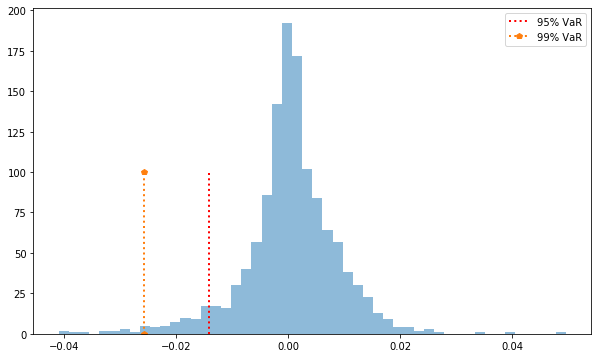

Date
2015-01-02   -0.000340
2015-01-05   -0.018278
2015-01-06   -0.008894
2015-01-07    0.011630
2015-01-08    0.017888
                ...   
2019-12-24   -0.000195
2019-12-26    0.005128
2019-12-27    0.000034
2019-12-30   -0.005781
2019-12-31    0.002946
Name: S&P 500, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.014229595
ES 95% Connfidence Level:  -0.021716101587301577


VaR 99% Confidence Level:  -0.025786586
ES 99% Connfidence Level:  -0.03257686153846154





In [25]:
for col in Daily_return.columns:
    VaR_95 = np.percentile(Daily_return[col], 5)
    ES_95 = Daily_return[col][Daily_return[col] <= VaR_95].mean()
    
    VaR_99 = np.percentile(Daily_return[col], 1)
    ES_99 = Daily_return[col][Daily_return[col] <= VaR_99].mean()
    
    VaR_plotting(Daily_return[col], VaR_95, VaR_99, ES_95, ES_99)

In [26]:
var_95 = []
es_95 = []
var_99 = []
es_99 = []

for col in Daily_return.columns:
    VaR_95 = Daily_return[col].quantile(0.05)
    var_95.append(VaR_95)
    
    ES_95 = Daily_return[col][Daily_return[col] <= VaR_95].mean()
    es_95.append(ES_95)
    
    VaR_99 = Daily_return[col].quantile(0.01)
    var_99.append(VaR_99)
    
    ES_99 = Daily_return[col][Daily_return[col] <= VaR_99].mean()
    es_99.append(ES_99)
    
VaR_95 = pd.DataFrame(var_95, columns=['VaR_95'], index=Daily_return.columns)
ES_95 = pd.DataFrame(es_95, columns=['ES_95'], index=Daily_return.columns)
VaR_99 = pd.DataFrame(var_99, columns=['VaR_99'], index=Daily_return.columns)
ES_99 = pd.DataFrame(es_99, columns=['ES_99'], index=Daily_return.columns)

VaR_ES = pd.concat([VaR_95, ES_95, VaR_99, ES_99], axis=1)
VaR_ES

,VaR_95,ES_95,VaR_99,ES_99
GOOGL,-0.023336,-0.033507,-0.042891,-0.051949
JPM,-0.020872,-0.030157,-0.037103,-0.045448
MSFT,-0.021057,-0.033567,-0.038642,-0.051389
AAPL,-0.024996,-0.036180,-0.044293,-0.057945
VZ,-0.016372,-0.024241,-0.029151,-0.037171
AMZN,-0.025582,-0.040740,-0.051668,-0.061713
JNJ,-0.015046,-0.024934,-0.029031,-0.044122
MMM,-0.018423,-0.030652,-0.037175,-0.053587
BRK-B,-0.014960,-0.024245,-0.028555,-0.041408
BMY,-0.022954,-0.040110,-0.047556,-0.080518


In [27]:
# VaR_ES.to_csv('VaR_ES.csv')

In [28]:
Daily_return_2020 = pd.read_excel('/Users/andy/Desktop/PM/Daily_return(2020).xlsx')
Daily_return_2020 = Daily_return_2020.set_index('Date')

SNP_2020 = yf.download('^GSPC', start='2020-1-1', end='2021-1-1', progress=True)
SNP500_2020 = SNP_2020['Adj Close'] / SNP_2020['Adj Close'].shift(1) - 1
SNP500_2020 = SNP500_2020[1:]

Daily_return_2020 = pd.concat([Daily_return_2020, SNP500_2020], axis=1)
Daily_return_2020.rename(columns={'Adj Close': 'SNP500'}, inplace=True) 
Daily_return_2020.head()
Daily_return_2020.head()

[*********************100%***********************]  1 of 1 completed


,GOOGL,JPM,MSFT,AAPL,VZ,AMZN,JNJ,MMM,BRK-B,BMY,Fund,Optimal Risky Portfolio,Minimum Variance Portfolio,Equally Weight Portfolio,MSCI,SNP500
Date,,,,,,,,,,,,,,,,
2020-01-02,0.021868,0.012124,0.018516,0.022816,-0.005700,0.027151,0.000686,0.020292,0.008344,-0.006275,0.005136,0.016292,0.005356,0.011982,0.007403,0.008379
2020-01-03,-0.005231,-0.013196,-0.012452,-0.009722,-0.010647,-0.012139,-0.011578,-0.008611,-0.009676,-0.008841,-0.007920,-0.011832,-0.009593,-0.010209,-0.005396,-0.007060
2020-01-06,0.026654,-0.000795,0.002585,0.007968,-0.002152,0.014886,-0.001247,0.000953,0.003581,0.003186,0.002060,0.006295,0.004892,0.005562,0.000580,0.003533
2020-01-07,-0.001932,-0.017001,-0.009118,-0.004703,-0.011117,0.002092,0.006107,-0.004031,-0.004714,0.015084,-0.003341,-0.005960,-0.002149,-0.002933,-0.000871,-0.002803
2020-01-08,0.007118,0.007801,0.015928,0.016086,0.001846,-0.007809,-0.000138,0.015346,0.000310,-0.001095,0.005157,0.002839,0.002010,0.005539,0.001905,0.004902


In [29]:
# Daily_return_2020.to_csv('Daily_return(2020).csv')

In [30]:
data3 = []
for col in Daily_return_2020.columns:
    a = ((Daily_return_2020[col]+1).cumprod()-1)
    data3.append(a)
    
df3_T = pd.DataFrame(data3)
AC_return_2020 = df3_T.T
AC_return_2020.tail()

,GOOGL,JPM,MSFT,AAPL,VZ,AMZN,JNJ,MMM,BRK-B,BMY,Fund,Optimal Risky Portfolio,Minimum Variance Portfolio,Equally Weight Portfolio,MSCI,SNP500
Date,,,,,,,,,,,,,,,,
2020-12-24,0.294739,-0.074305,0.427456,0.813175,0.000221,0.716972,0.073662,0.026065,0.000132,-0.017983,-0.050334,0.409768,0.092270,0.225865,0.109114,0.146181
2020-12-28,0.324454,-0.068209,0.441618,0.878024,0.002601,0.777189,0.078732,0.027182,0.008433,-0.018465,-0.048536,0.437524,0.101965,0.241347,0.116426,0.156179
2020-12-29,0.312359,-0.070662,0.436427,0.853019,-0.000289,0.797775,0.085421,0.022125,0.013554,-0.013648,-0.052131,0.439922,0.102920,0.240266,0.118669,0.153604
2020-12-30,0.296299,-0.068060,0.420599,0.837219,-0.011679,0.778211,0.098871,0.023654,0.013907,-0.005618,-0.047509,0.427058,0.101568,0.236684,0.120288,0.155151
2020-12-31,0.308536,-0.055348,0.425341,0.823067,-0.001309,0.762561,0.108237,0.027652,0.023709,0.004094,-0.041089,0.428008,0.111468,0.243148,0.121948,0.162589


In [31]:
# AC_return_2020.to_csv('AC_return(2020).csv')